# File Setup

The purpose of this notebook is to visualise the Tarawa data from Antonio to see if there are specific events that should be modeled with a BN through time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from datetime import datetime
import rpy2
import os
os.environ['R_HOME'] = '/lib/R'
%load_ext rpy2.ipython

from preprocessing_all_points import *
from preprocessing_points_spatially_temporally import *
from compile_model_t import *

# Load the data

In [3]:
# Import and preprocess data
df_lagoon_profiles,df_ocean_profiles,inundation_dict,winds_dict,waves_dict,tide_dict,sla_dict,time_dict = \
    loading_tarawa_data()

In [4]:
df_ocean,df_lagoon = preprocessing_points_spatially()
df_lagoon,lagoon_data_dict = BN_Antonio_preprocessing_lagoon(df_lagoon)
df_ocean,ocean_data_dict = BN_Antonio_preprocessing_ocean(df_ocean)

# Looking for Patterns in Wind data

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Clusting data based on the wind u and v speed vectors
df_winds = pd.DataFrame.from_dict({**winds_dict},orient='index').T
test = df_winds.to_numpy()
km = KMeans(n_clusters=4).fit(test)

Colour indicates clusters based on wind_u and wind_v


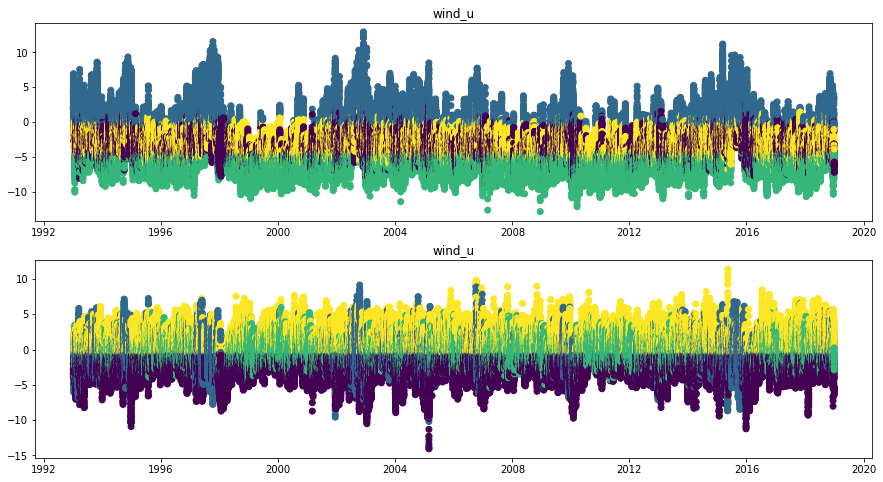

In [7]:
fig = plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],df_winds['wind_u'],c=km.labels_)
ax2.scatter(time_dict['time'],df_winds['wind_v'],c=km.labels_)

ax1.set_title('wind_u')
ax2.set_title('wind_u')

print('Colour indicates clusters based on wind_u and wind_v')

plt.show()

/tmp/ipykernel_587/3688171151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)
/tmp/ipykernel_587/3688171151.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave['clusters'] = km.labels_
/tmp/ipykernel_587/3688171151.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

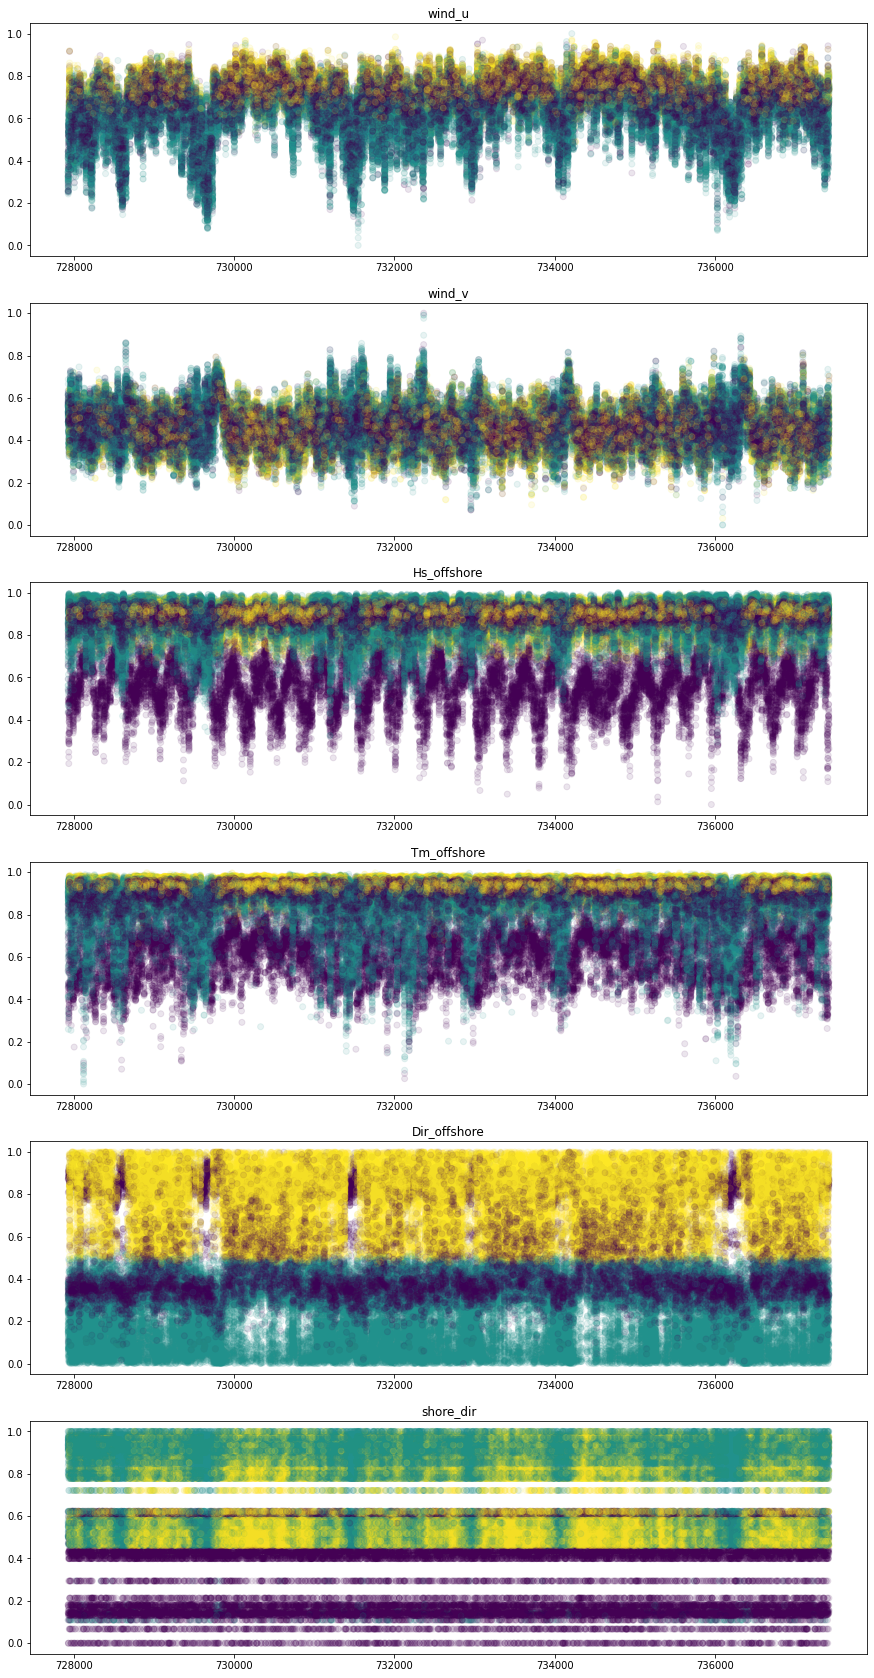

In [8]:
# Have a look at the different variables, with color indicating the clusters

df_ocean_wind_wave = df_ocean[['wind_u','wind_v','Hs_offshore','Tm_offshore','Dir_offshore','shore_dir']]

for col in list(df_ocean_wind_wave):
    max_col = np.max(df_ocean_wind_wave[col])
    min_col = np.min(df_ocean_wind_wave[col])
    df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)

test = df_ocean_wind_wave.to_numpy()
km = KMeans(n_clusters=3).fit(test)

fig = plt.figure(figsize=(15,30))

ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

for ax,var in zip([ax1,ax2,ax3,ax4,ax5,ax6],list(df_ocean_wind_wave)):
    ax.scatter(df_ocean.time,df_ocean_wind_wave[var],c=km.labels_,alpha=0.1)
    ax.set_title(var)
    
df_ocean_wind_wave['clusters'] = km.labels_
df_ocean_wind_wave['time'] = df_ocean.time
df_ocean_wind_wave['time'] = [(datetime.fromordinal(int(time)-366)+timedelta(days=time%1)) for time in df_ocean['time']]
df_ocean_wind_wave = df_ocean_wind_wave.sort_values('time')

In [9]:
df_day = df_ocean_wind_wave[(df_ocean_wind_wave.time>=datetime(1993,1,1,0,0,0))&(df_ocean_wind_wave.time<datetime(1993,1,2,0,0,0))]

In [10]:
# for index,group in df_day.groupby('clusters'):
#     !R -i df_day
#     !R summary(df_day)


In [11]:
# %%R -i df_ocean_wind_wave

# summary(df_ocean_wind_wave)

# Find "King tide" events

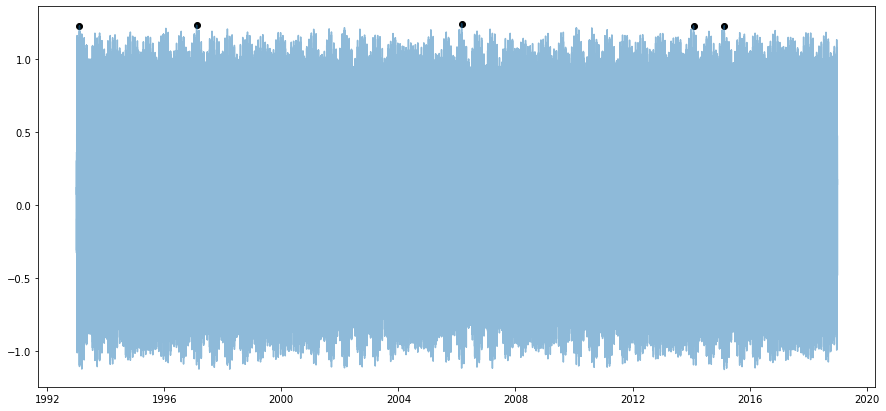

In [38]:
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.plot(time_dict['time'],tide_dict['Tide'],alpha=0.5)

ax1.scatter(np.array(time_dict['time'])[tide_dict['Tide']>1.22],tide_dict['Tide'][tide_dict['Tide']>1.22],c='k')

plt.show()

In [49]:
df_king_tides = pd.DataFrame.from_dict({'time':np.array(time_dict['time'])[tide_dict['Tide']>1.22],
                        'tide':np.array(tide_dict['Tide'])[tide_dict['Tide']>1.22]},orient='index').T

print("Time of 'king' tides")
df_king_tides

Time of 'king' tides


time      tide
0 1993-02-07 05:00:00.000003  1.226567
1 1997-02-08 05:00:00.000003  1.230636
2 2006-02-28 05:00:00.000003  1.241785
3 2014-01-31 05:00:00.000003  1.226616
4 2015-02-19 05:00:00.000003  1.227578

# Large Wave Periods/Cyclones

## Shoreline Direction

In [13]:
# First, group the shorelines into faceing different directions

In [119]:
longs = [x[0] for x in inundation_dict['Ptos']]
lats = [x[1] for x in inundation_dict['Ptos']]


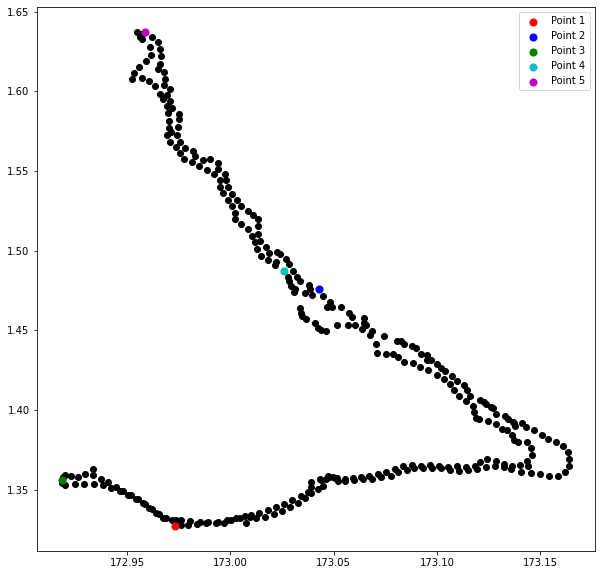

In [133]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(longs,lats,c='k')

p1 = ax1.scatter(longs[161],lats[161],c='r',s=50,zorder=10)
p2 = ax1.scatter(longs[299],lats[299],c='b',s=50,zorder=10)
p3 = ax1.scatter(longs[146],lats[146],c='g',s=50,zorder=10)
p4 = ax1.scatter(longs[110],lats[110],c='c',s=50,zorder=10)
p5 = ax1.scatter(longs[247],lats[247],c='m',s=50,zorder=10)


plt.legend([p1,p2,p3,p4,p5],['Point 1','Point 2','Point 3','Point 4','Point 5'])

plt.show()


In [16]:
df_ocean_coords = df_ocean[['lat','long','shore_dir']]
df_ocean_coords = df_ocean_coords.drop_duplicates()

df_ocean_coords

lat       long   shore_dir
0       1.359241  172.92001  319.061643
1000    1.356421  172.91848  272.206588
2000    1.353139  172.92019  188.726378
3000    1.353647  172.92488  181.362270
4000    1.353986  172.92935  177.157178
...          ...        ...         ...
170915  1.357814  172.91907  298.809736
171915  1.354158  172.91862  246.268673
172915  1.636152  172.95727  340.506556
173915  1.356990  173.04626  158.526428
174915  1.357409  173.05073  174.640023

[176 rows x 3 columns]

For an example point, have a look at how the wave height, period and direction have changed, and see if these correlate to events

## Visualise wave height and wave period for specific location

In [134]:

wave_period_pt1 = waves_dict['Tmo'][:,161]
wave_height_pt1 = waves_dict['Hso'][:,161]
wave_time_pt1 = np.array(waves_dict['Timeo'])

wave_period_pt2 = waves_dict['Tmo'][:,299]
wave_height_pt2 = waves_dict['Hso'][:,299]
wave_time_pt2 = np.array(waves_dict['Timeo'])

wave_period_pt3 = waves_dict['Tmo'][:,146]
wave_height_pt3 = waves_dict['Hso'][:,146]
wave_time_pt3 = np.array(waves_dict['Timeo'])

wave_period_pt4 = waves_dict['Tmo'][:,110]
wave_height_pt4 = waves_dict['Hso'][:,110]
wave_time_pt4 = np.array(waves_dict['Timeo'])

wave_period_pt5 = waves_dict['Tmo'][:,247]
wave_height_pt5 = waves_dict['Hso'][:,247]
wave_time_pt5 = np.array(waves_dict['Timeo'])


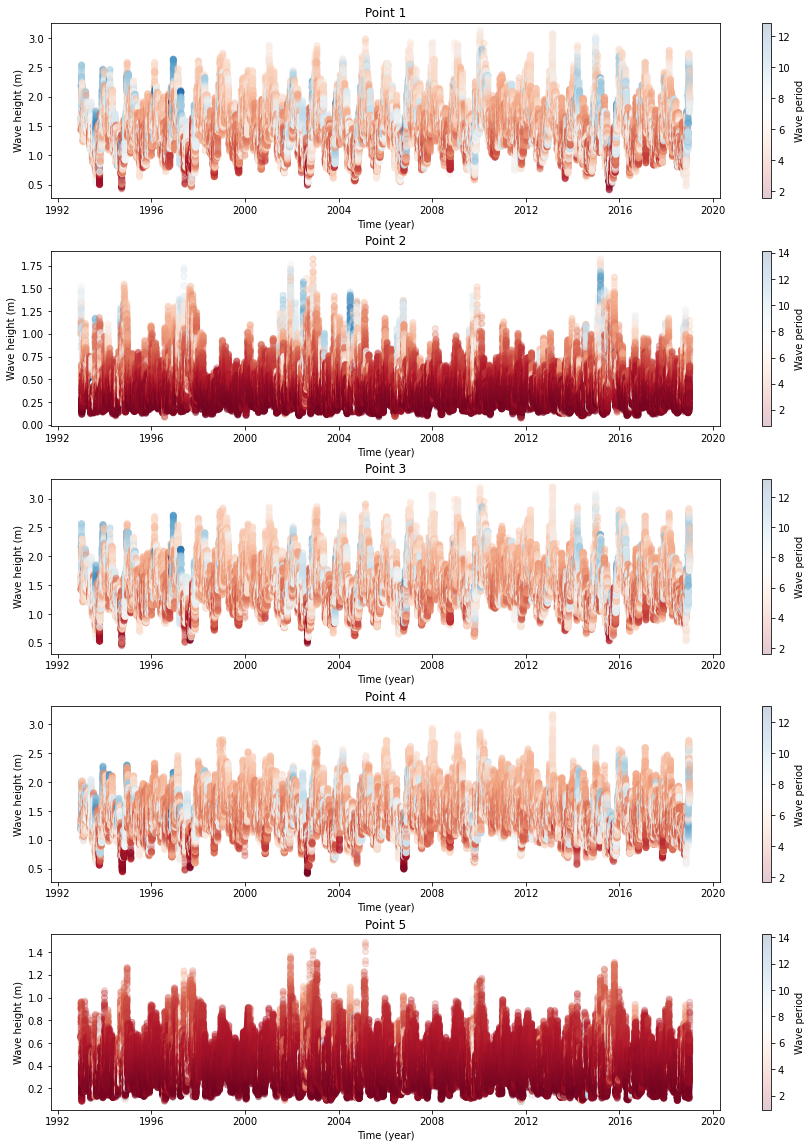

In [137]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)

ax1 = plt.subplot2grid((5,1),(0,0))
ax2 = plt.subplot2grid((5,1),(1,0))
ax3 = plt.subplot2grid((5,1),(2,0))
ax4 = plt.subplot2grid((5,1),(3,0))
ax5 = plt.subplot2grid((5,1),(4,0))

output_pt1 = ax1.scatter(wave_time_pt1,wave_height_pt1,c=wave_period_pt1,alpha=0.2,cmap='RdBu')
ax1.set_title('Point 1')

output_pt2 = ax2.scatter(wave_time_pt2,wave_height_pt2,c=wave_period_pt2,alpha=0.2,cmap='RdBu')
ax2.set_title('Point 2')

output_pt3 = ax3.scatter(wave_time_pt3,wave_height_pt3,c=wave_period_pt3,alpha=0.2,cmap='RdBu')
ax3.set_title('Point 3')

output_pt4 = ax4.scatter(wave_time_pt4,wave_height_pt4,c=wave_period_pt4,alpha=0.2,cmap='RdBu')
ax4.set_title('Point 4')

output_pt5 = ax5.scatter(wave_time_pt5,wave_height_pt5,c=wave_period_pt5,alpha=0.2,cmap='RdBu')
ax5.set_title('Point 5')

# max_wave_period = 8
# storm_wave_period = wave_period[wave_period>max_wave_period]
# storm_wave_height = wave_height[wave_period>max_wave_period]
# storm_time = wave_time[wave_period>max_wave_period]
# output = ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

for ax,output in zip([ax1,ax2,ax3,ax4,ax5],[output_pt1,output_pt2,output_pt3,output_pt4,output_pt5]):    
    ax.set_ylabel('Wave height (m)')
    ax.set_xlabel('Time (year)')
    plt.colorbar(output,ax=ax,label='Wave period')

plt.show()

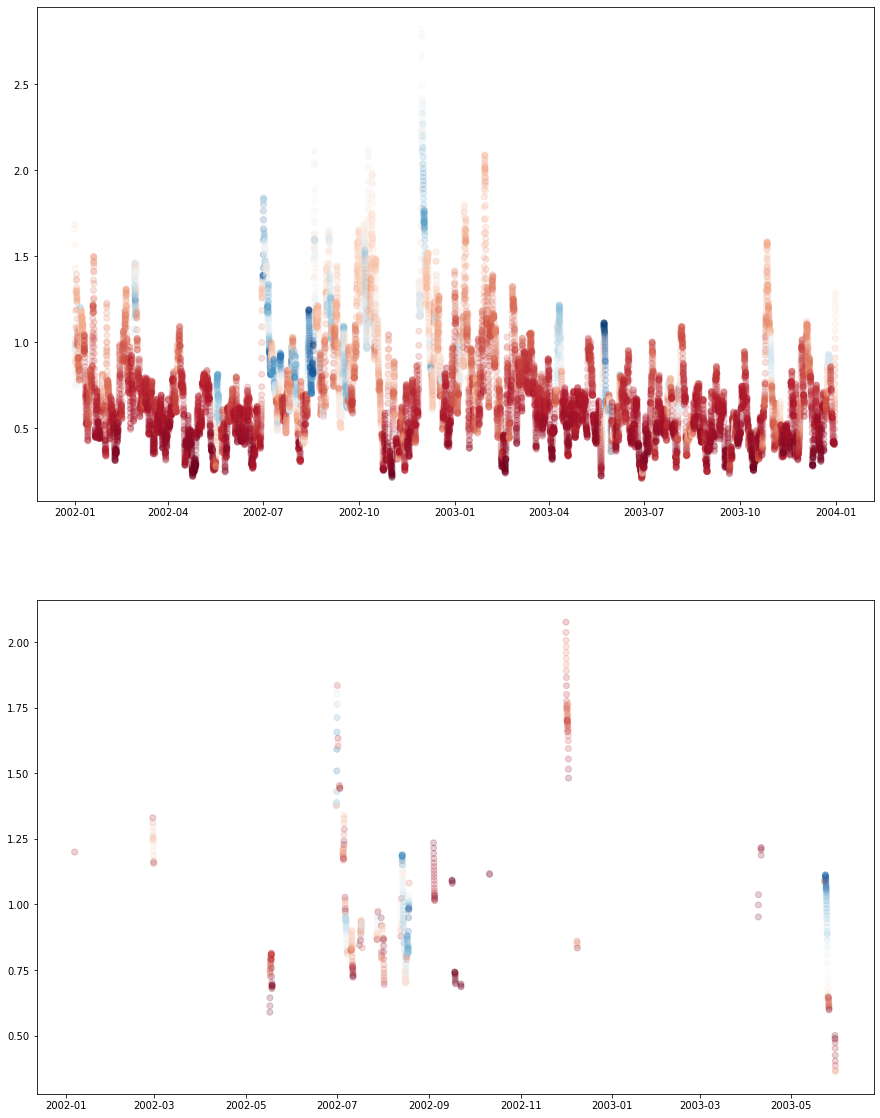

In [20]:
start_year = 2002
end_year = 2004

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

plt.show()

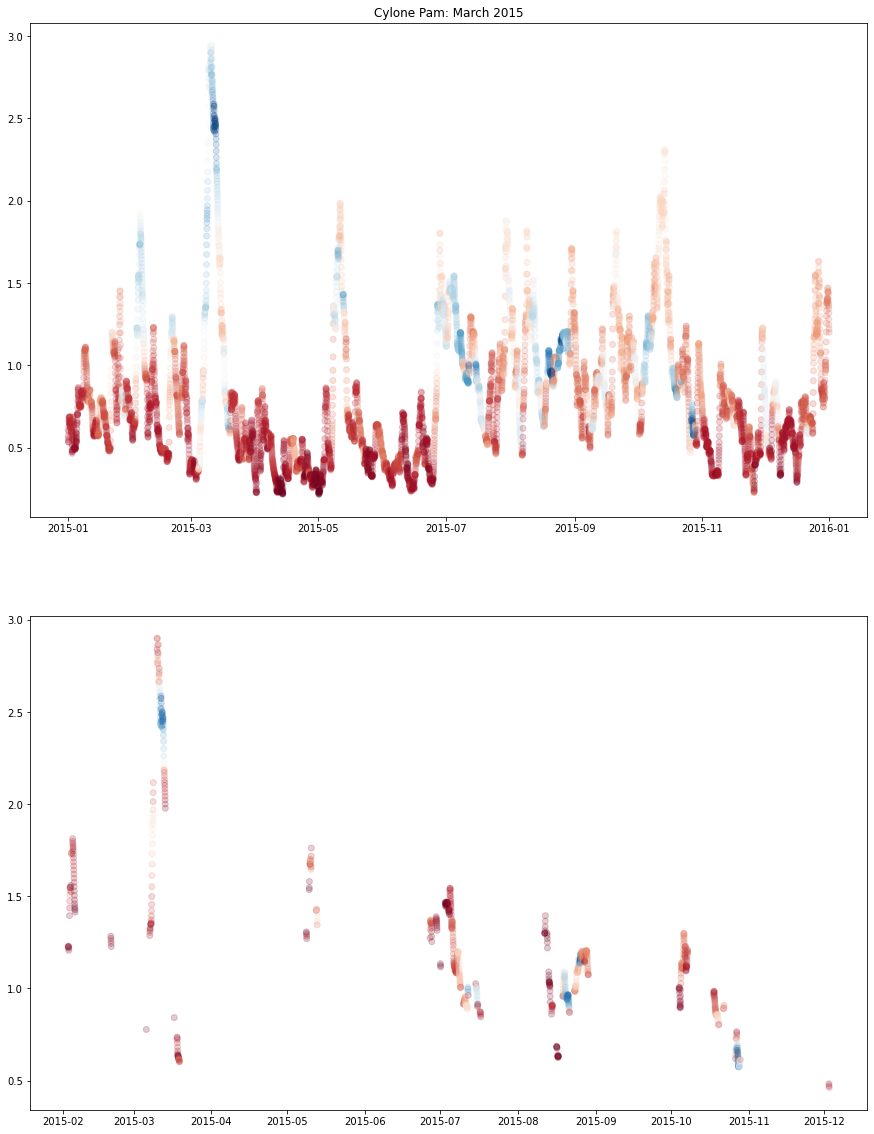

In [21]:
start_year = 2015
end_year = 2016

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

ax1.set_title('Cylone Pam: March 2015')

plt.show()

# Cyclones
- March 2015; cyclone Pam (6-20th)
- 



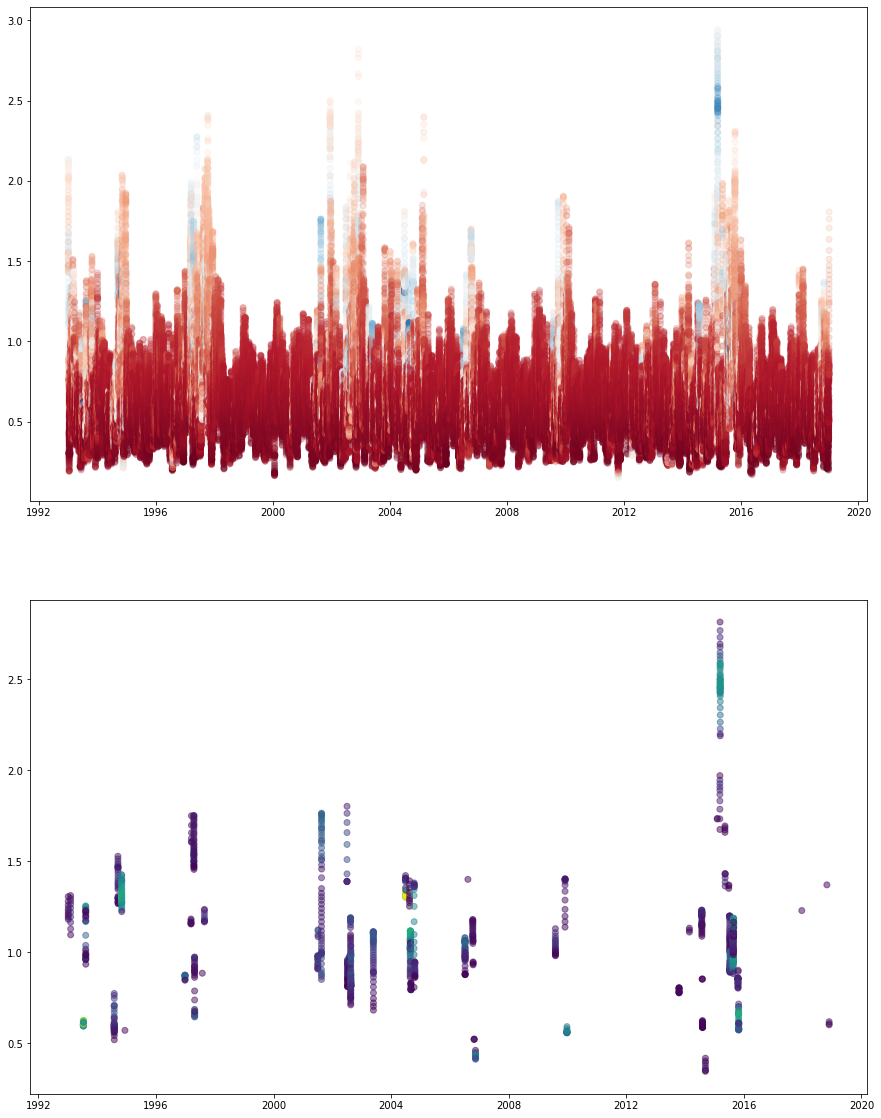

In [22]:
fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],waves_dict['Hso'][:,0],c=waves_dict['Tmo'][:,0],alpha=0.2,cmap='RdBu')

max_wave_period = 8
storm_wave_period = waves_dict['Tmo'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_wave_height = waves_dict['Hso'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_time = np.array(waves_dict['Timeo'])[waves_dict['Tmo'][:,0]>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.5)

plt.show()

In [23]:
waves_dict['Timeo']

[datetime.datetime(1993, 1, 1, 0, 0),
 datetime.datetime(1993, 1, 1, 0, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 2, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 3, 0),
 datetime.datetime(1993, 1, 1, 3, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 5, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 6, 0),
 datetime.datetime(1993, 1, 1, 6, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 8, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 9, 0),
 datetime.datetime(1993, 1, 1, 9, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 11, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 12, 0),
 datetime.datetime(1993, 1, 1, 12, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 14, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 15, 0),
 datetime.datetime(1993, 1, 1, 15, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 17, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 18, 0),
 datetime.datetime(1993, 1, 1, 18, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 20, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 21, 0),
 datetime.datetime(1

In [24]:
time_dict['time']

[datetime.datetime(1993, 1, 1, 0, 0),
 datetime.datetime(1993, 1, 1, 0, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 2, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 3, 0),
 datetime.datetime(1993, 1, 1, 3, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 5, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 6, 0),
 datetime.datetime(1993, 1, 1, 6, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 8, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 9, 0),
 datetime.datetime(1993, 1, 1, 9, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 11, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 12, 0),
 datetime.datetime(1993, 1, 1, 12, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 14, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 15, 0),
 datetime.datetime(1993, 1, 1, 15, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 17, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 18, 0),
 datetime.datetime(1993, 1, 1, 18, 59, 59, 999997),
 datetime.datetime(1993, 1, 1, 20, 0, 0, 3),
 datetime.datetime(1993, 1, 1, 21, 0),
 datetime.datetime(1

In [25]:
tide_dict['Tide']

array([ 0.11754664, -0.01880866, -0.13627197, ..., -0.30936497,
       -0.08429388,  0.1718647 ])